In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load datasets
# File 1: mountains.csv
mountains_url = 'https://drive.google.com/uc?id=10KW8aIbG2yZi1Xw545usPdrsprNZsdf4'
mountains_output = 'mountains.csv'
gdown.download(mountains_url, mountains_output, quiet=False)
mountains = pd.read_csv(mountains_output)

# File 2: weather.csv
weather_url = 'https://drive.google.com/uc?id=1kzzLkqeBPVxUr-9Ec0GPsPR7UqtRdeMk'
weather_output = 'weather.csv'
gdown.download(weather_url, weather_output, quiet=False)
weather = pd.read_csv(weather_output)

Downloading...
From: https://drive.google.com/uc?id=10KW8aIbG2yZi1Xw545usPdrsprNZsdf4
To: /content/mountains.csv
100%|██████████| 23.8k/23.8k [00:00<00:00, 3.92MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1kzzLkqeBPVxUr-9Ec0GPsPR7UqtRdeMk
From (redirected): https://drive.google.com/uc?id=1kzzLkqeBPVxUr-9Ec0GPsPR7UqtRdeMk&confirm=t&uuid=3e520056-9bf1-41d5-b5eb-7ba2a16614a2
To: /content/weather.csv
100%|██████████| 132M/132M [00:02<00:00, 50.6MB/s]


In [3]:
mountains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama            207 non-null    object 
 1   provinsi        207 non-null    object 
 2   kabupaten       207 non-null    object 
 3   kecamatan       207 non-null    object 
 4   ketinggian      207 non-null    int64  
 5   jenis gunung    207 non-null    object 
 6   status          207 non-null    object 
 7   akses           207 non-null    object 
 8   jarak           207 non-null    int64  
 9   elevation gain  207 non-null    int64  
 10  latitude        207 non-null    float64
 11  longitude       207 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 19.5+ KB


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408416 entries, 0 to 408415
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   datetime        408416 non-null  object 
 1   datetimeepoch   408416 non-null  int64  
 2   tempmax         408416 non-null  float64
 3   tempmin         408416 non-null  float64
 4   temp            408416 non-null  float64
 5   feelslikemax    408416 non-null  float64
 6   feelslikemin    408416 non-null  float64
 7   feelslike       408416 non-null  float64
 8   dew             408416 non-null  float64
 9   humidity        408416 non-null  float64
 10  precip          408416 non-null  float64
 11  precipprob      408416 non-null  float64
 12  precipcover     408416 non-null  float64
 13  snow            408416 non-null  float64
 14  snowdepth       408416 non-null  float64
 15  windgust        408416 non-null  float64
 16  windspeed       408416 non-null  float64
 17  winddir   

In [5]:
# Merge on kecamatan
combined_df = pd.merge(weather, mountains, on='kecamatan', how='inner')

In [6]:
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Sort by datetime
combined_df = combined_df.sort_values(by='datetime').reset_index(drop=True)

In [7]:
combined_df

,datetime,datetimeepoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,provinsi,kabupaten,ketinggian,jenis gunung,status,akses,jarak,elevation gain,latitude,longitude
0,2020-01-01,1577811600,31.1,20.6,24.8,36.9,20.6,26.0,22.0,85.6,...,sumatera utara,tapanuli selatan,1900,stratovolcano,tidak aktif,buka,11000,1000,1.478815,99.208871
1,2020-01-01,1577808000,30.1,24.7,27.4,37.4,24.7,30.9,24.9,86.3,...,bali,tabanan,2087,stratovolcano,tidak aktif,buka,10100,790,8.307259,115.101937
2,2020-01-01,1577811600,31.3,20.4,25.6,37.8,20.4,27.3,22.6,84.8,...,jawa tengah,kendal,2590,non volcanic,tidak aktif,buka,9000,600,7.033638,109.954152
3,2020-01-01,1577811600,31.3,20.4,25.6,37.8,20.4,27.3,22.6,84.8,...,jawa tengah,wonosobo,2365,maar volcano,tidak aktif,buka,3500,350,7.238485,109.888846
4,2020-01-01,1577808000,30.1,21.9,27.1,37.4,21.9,30.5,24.7,86.9,...,bali,badung,2096,caldera,tidak aktif,buka,14600,1462,8.247104,115.187623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440435,2025-05-20,1747674000,33.0,25.0,28.9,39.7,25.0,32.8,24.3,77.5,...,jawa barat,purwakarta,2050,stratovolcano,tidak aktif,buka,11000,1100,6.773272,107.555684
440436,2025-05-20,1747670400,28.7,26.7,27.7,31.6,26.7,30.0,22.0,71.2,...,nusa tenggara timur,sikka,875,stratovolcano,aktif,tutup,13200,735,8.328063,121.713110
440437,2025-05-20,1747674000,29.4,22.2,24.9,32.8,22.2,25.8,22.4,86.6,...,jawa tengah,boyolali,2897,stratovolcano,aktif,tutup,8900,1300,7.539951,110.447011
440438,2025-05-20,1747670400,28.8,24.3,26.7,32.8,24.3,28.2,23.1,81.1,...,gorontalo,pahuwato,1539,extinct volcano,tidak aktif,buka,15000,1100,0.647312,121.248049


In [8]:
features = ['ketinggian', 'jarak', 'elevation gain', 'temp', 'humidity', 'precipprob', 'windspeed']
combined_df = combined_df[features]

In [9]:
# cek info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440440 entries, 0 to 440439
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ketinggian      440440 non-null  int64  
 1   jarak           440440 non-null  int64  
 2   elevation gain  440440 non-null  int64  
 3   temp            440440 non-null  float64
 4   humidity        440440 non-null  float64
 5   precipprob      440440 non-null  float64
 6   windspeed       440440 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 23.5 MB


In [10]:
# Scale
weather_features = ['temp', 'humidity', 'precipprob', 'windspeed']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(combined_df[weather_features])
scaled_df = pd.DataFrame(scaled, columns=[f"{col}_scaled" for col in weather_features])

# Gabungkan ke combined_df
combined_df = pd.concat([combined_df, scaled_df], axis=1)

In [ ]:
combined_df

,ketinggian,jarak,elevation gain,temp,humidity,precipprob,windspeed,temp_scaled,humidity_scaled,precipprob_scaled,windspeed_scaled
0,1900,11000,1000,24.8,85.6,100.0,13.0,0.636364,0.823892,1.0,0.057958
1,2087,10100,790,27.4,86.3,100.0,24.1,0.696970,0.832512,1.0,0.107445
2,2590,9000,600,25.6,84.8,100.0,22.3,0.655012,0.814039,1.0,0.099420
3,2365,3500,350,25.6,84.8,100.0,22.3,0.655012,0.814039,1.0,0.099420
4,2096,14600,1462,27.1,86.9,100.0,24.1,0.689977,0.839901,1.0,0.107445
...,...,...,...,...,...,...,...,...,...,...,...
440435,2050,11000,1100,28.9,77.5,100.0,16.6,0.731935,0.724138,1.0,0.074008
440436,875,13200,735,27.7,71.2,0.0,8.3,0.703963,0.646552,0.0,0.037004
440437,2897,8900,1300,24.9,86.6,100.0,18.0,0.638695,0.836207,1.0,0.080250
440438,1539,15000,1100,26.7,81.1,100.0,12.6,0.680653,0.768473,1.0,0.056175


In [11]:
def base_difficulty(row):
    elevation_gain_ft = row['elevation gain'] * 3.28084  # konversi meter ke feet
    distance_mi = row['jarak'] / 1609.34  # konversi meter ke mile
    raw_score = math.sqrt(elevation_gain_ft * 2 * distance_mi) #shenandoah formula
    return raw_score

def full_difficulty_score(row):
    base = base_difficulty(row)
    weather_penalty = (
        0.25 * row['precipprob_scaled'] +
        0.25 * row['windspeed_scaled'] +
        0.25 * row['temp_scaled'] +
        0.25 * row['humidity_scaled']
    )
    final_score = base * (1 + weather_penalty)
    return final_score

# Normalize difficulty to 1–10 range
def normalize_difficulty(scores):
    min_score = scores.min()
    max_score = scores.max()
    return 1 + 9 * ((scores - min_score) / (max_score - min_score))

In [12]:
combined_df['base_difficulty_score'] = combined_df.apply(base_difficulty, axis=1)
combined_df['full_difficulty_score'] = combined_df.apply(full_difficulty_score, axis=1)
combined_df['difficulty_score'] = normalize_difficulty(combined_df['full_difficulty_score']) # normalized score

In [13]:
def estimate_time(row):
    base_time = (row['jarak'] / 5000) + (row['elevation gain'] / 600) # naismith rule
    difficulty_factor = row['difficulty_score'] / 10
    return base_time * (1 + difficulty_factor)

combined_df['estimated_time'] = combined_df.apply(estimate_time, axis=1)

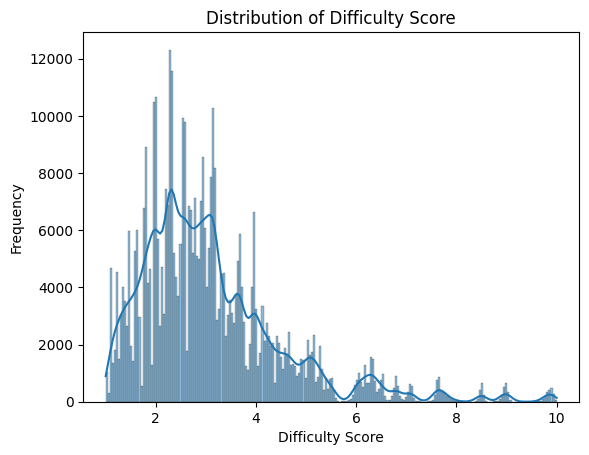

In [14]:
sns.histplot(combined_df['difficulty_score'], kde=True)
plt.title("Distribution of Difficulty Score")
plt.xlabel("Difficulty Score")
plt.ylabel("Frequency")
plt.show()

In [15]:
combined_df = combined_df.drop(columns=['temp_scaled', 'precipprob_scaled', 'windspeed_scaled', 'humidity_scaled', 'base_difficulty_score', 'full_difficulty_score'])

In [17]:
combined_df.rename(columns={'elevation gain': 'elevation_gain'}, inplace=True)

In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440440 entries, 0 to 440439
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ketinggian        440440 non-null  int64  
 1   jarak             440440 non-null  int64  
 2   elevation_gain    440440 non-null  int64  
 3   temp              440440 non-null  float64
 4   humidity          440440 non-null  float64
 5   precipprob        440440 non-null  float64
 6   windspeed         440440 non-null  float64
 7   difficulty_score  440440 non-null  float64
 8   estimated_time    440440 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 30.2 MB


In [19]:
combined_df.to_csv('model2_dataset.csv', index=False)